In [1]:
#import required libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import xgboost as xgb
from sklearn.linear_model import LinearRegression

In [3]:
# Read the Excel file into a pandas DataFrame
df = pd.read_excel('price_dataset1.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216500 entries, 0 to 216499
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   District Name              216500 non-null  object        
 1   Market Name                216500 non-null  object        
 2   Commodity                  216500 non-null  object        
 3   Variety                    216500 non-null  object        
 4   Modal Price (Rs./Quintal)  216500 non-null  float64       
 5   Price Date                 216500 non-null  datetime64[ns]
 6   Month                      216500 non-null  object        
 7   Day                        216500 non-null  object        
 8   Season                     216500 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 14.9+ MB


In [5]:
# Count null values per column
null_counts = df.isnull().sum()
print("\nNull Counts per Column:\n", null_counts)


Null Counts per Column:
 District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Modal Price (Rs./Quintal)    0
Price Date                   0
Month                        0
Day                          0
Season                       0
dtype: int64


In [6]:
#drop 'Price Date' column
df = df.drop(columns=['Price Date'], inplace=False)

In [7]:
#rename 'Modal Price (Rs./Quintal)' to 'Modal Price'
df.rename(columns={'Modal Price (Rs./Quintal)': 'Modal Price'}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216500 entries, 0 to 216499
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   District Name  216500 non-null  object 
 1   Market Name    216500 non-null  object 
 2   Commodity      216500 non-null  object 
 3   Variety        216500 non-null  object 
 4   Modal Price    216500 non-null  float64
 5   Month          216500 non-null  object 
 6   Day            216500 non-null  object 
 7   Season         216500 non-null  object 
dtypes: float64(1), object(7)
memory usage: 13.2+ MB


In [9]:
folder_path = 'C:/Users/rudra/OneDrive/Desktop/RUNU_PROJECT/Graph Data'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

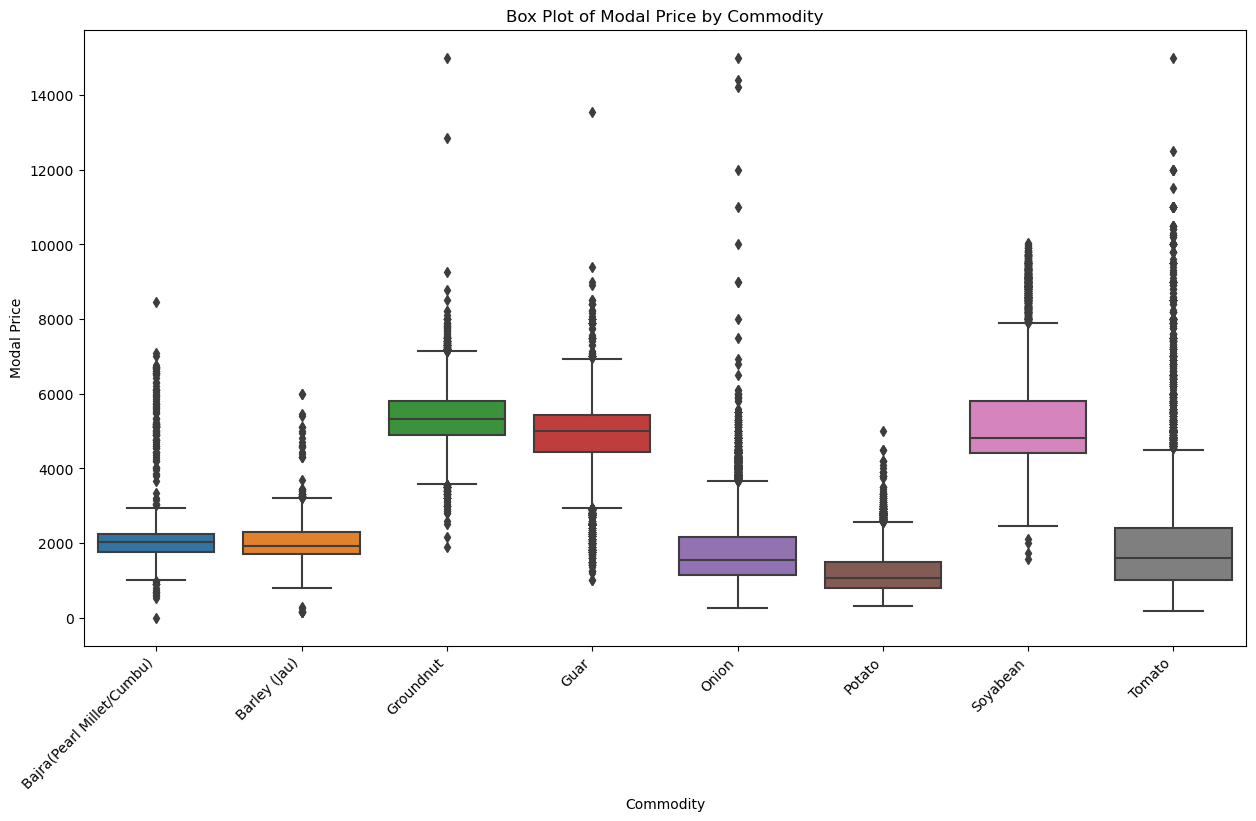

In [10]:
# Box plots grouped by Commodity of df
plt.figure(figsize=(15, 8))
sns.boxplot(x='Commodity', y='Modal Price', data=df)
plt.title('Box Plot of Modal Price by Commodity')
plt.xticks(rotation=45, ha='right') #rotate x axis labels.
file_path = os.path.join(folder_path, 'modal_price_boxplot_grouped_by_commodity.png')
plt.savefig(file_path)

plt.show()

In [11]:
# IQR method to identify outliers (grouped by commodity of df).
for commodity in df['Commodity'].unique():
    subset = df[df['Commodity'] == commodity]
    Q1_com = subset['Modal Price'].quantile(0.25)
    Q3_com = subset['Modal Price'].quantile(0.75)
    IQR_com = Q3_com - Q1_com
    
    # Define outliers_com
    outliers_com = subset[(subset['Modal Price'] < Q1_com - 1.5 * IQR_com) | (subset['Modal Price'] > Q3_com + 1.5 * IQR_com)]
    
    print(f"\nIQR outliers for {commodity}:\n", outliers_com)


IQR outliers for Bajra(Pearl Millet/Cumbu):
       District Name            Market Name                  Commodity  \
1229       Anupgarh               Anupgarh  Bajra(Pearl Millet/Cumbu)   
1540          Alwar                  Alwar  Bajra(Pearl Millet/Cumbu)   
1581         Barmer                 Barmer  Bajra(Pearl Millet/Cumbu)   
1628          Alwar              Barodamev  Bajra(Pearl Millet/Cumbu)   
2710         Nagaur  Deedwana(Choti Khatu)  Bajra(Pearl Millet/Cumbu)   
...             ...                    ...                        ...   
38662          Deeg                 Kumher  Bajra(Pearl Millet/Cumbu)   
39060          Deeg                  Nagar  Bajra(Pearl Millet/Cumbu)   
39134   Hanumangarh                  Nohar  Bajra(Pearl Millet/Cumbu)   
39498       Bikaner          Sridungargarh  Bajra(Pearl Millet/Cumbu)   
39659        Beawar             Vijaynagar  Bajra(Pearl Millet/Cumbu)   

          Variety  Modal Price      Month        Day  Season  
1229        Ot

In [12]:
df_filtered =df.copy()

In [13]:
commodity_list = df_filtered['Commodity'].unique().tolist()
print(commodity_list)

['Bajra(Pearl Millet/Cumbu)', 'Barley (Jau)', 'Groundnut', 'Guar', 'Onion', 'Potato', 'Soyabean', 'Tomato']


In [14]:
# Create a list to store the indices of rows to be dropped
outlier_indices_to_drop = []

In [15]:
# IQR method to identify outliner that needs to be drop (grouped by commodity in df) and .
for commodity in df['Commodity'].unique():
    subset = df[df['Commodity'] == commodity]
    Q1_com = subset['Modal Price'].quantile(0.25)
    Q3_com = subset['Modal Price'].quantile(0.75)
    IQR_com = Q3_com - Q1_com
    
    # Find the outliers (rows to be removed)
    outliers_com = subset[(subset['Modal Price'] < Q1_com - 1.5 * IQR_com) | (subset['Modal Price'] > Q3_com + 1.5 * IQR_com)]

    # Append the indices of outliers to the list
    outlier_indices_to_drop.extend(outliers_com.index)


In [16]:
# Remove the outliers from the DataFrame
df_filtered = df_filtered.drop(outlier_indices_to_drop)

# Reset the index of the DataFrame
df_filtered = df_filtered.reset_index(drop=True)

In [17]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211669 entries, 0 to 211668
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   District Name  211669 non-null  object 
 1   Market Name    211669 non-null  object 
 2   Commodity      211669 non-null  object 
 3   Variety        211669 non-null  object 
 4   Modal Price    211669 non-null  float64
 5   Month          211669 non-null  object 
 6   Day            211669 non-null  object 
 7   Season         211669 non-null  object 
dtypes: float64(1), object(7)
memory usage: 12.9+ MB


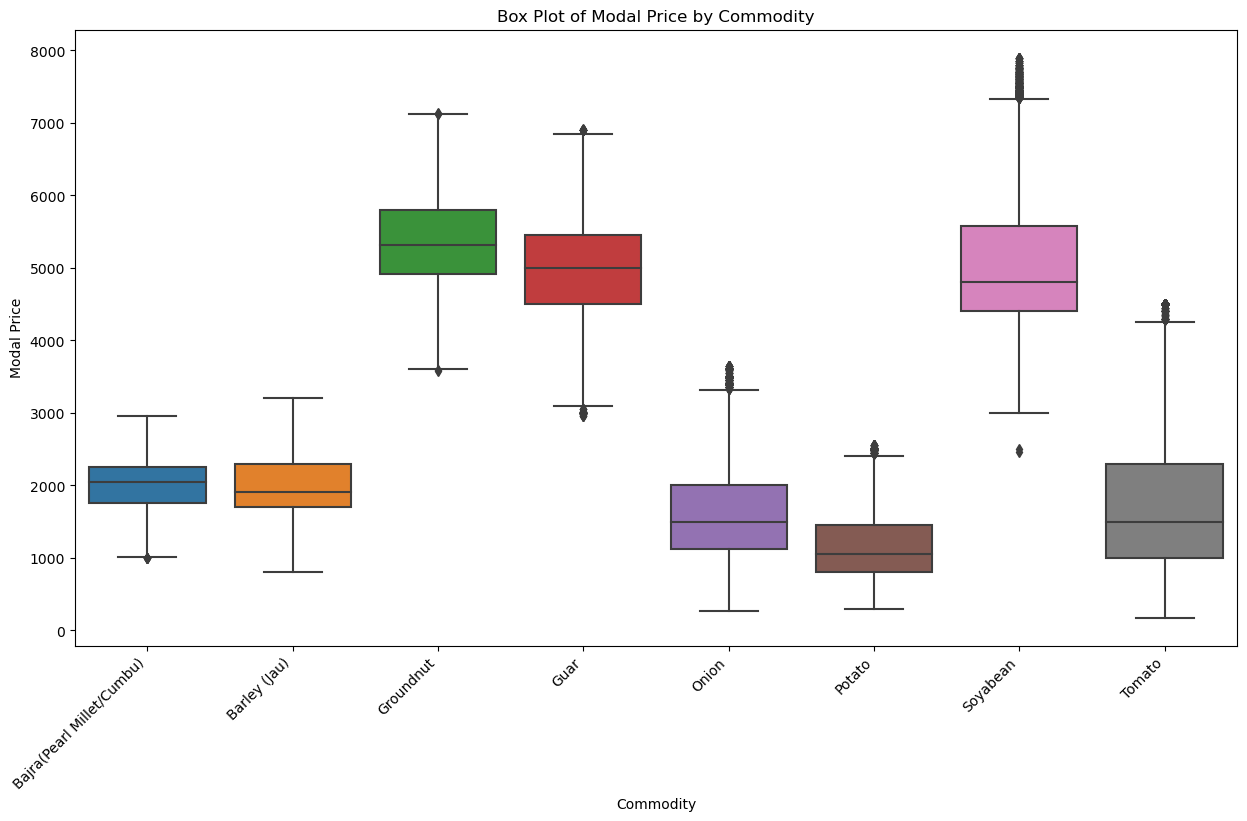

In [18]:
# Box plots grouped by Commodity of df_filtered
plt.figure(figsize=(15, 8))
sns.boxplot(x='Commodity', y='Modal Price', data=df_filtered)
plt.title('Box Plot of Modal Price by Commodity')
plt.xticks(rotation=45, ha='right') #rotate x axis labels.
file_path = os.path.join(folder_path, 'modal_price_boxplot_grouped_by_commodity_after_removal_first_iteration.png')
plt.savefig(file_path)

plt.show()

In [19]:
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)  # Should have fewer rows
print(df_filtered['Commodity'].unique())  # Check if all commodities are present

Original DataFrame shape: (216500, 8)
Filtered DataFrame shape: (211669, 8)
['Bajra(Pearl Millet/Cumbu)' 'Barley (Jau)' 'Groundnut' 'Guar' 'Onion'
 'Potato' 'Soyabean' 'Tomato']


In [20]:
df = df_filtered

In [21]:
# second iteration of oulier removal commodity-wise

# Create a list to store the indices of rows to be dropped
outlier_indices_to_drop = []

# IQR method to identify outliner that needs to be drop (grouped by commodity in df) and .
for commodity in df['Commodity'].unique():
    subset = df[df['Commodity'] == commodity]
    Q1_com = subset['Modal Price'].quantile(0.25)
    Q3_com = subset['Modal Price'].quantile(0.75)
    IQR_com = Q3_com - Q1_com
    
    # Find the outliers (rows to be removed)
    outliers_com = subset[(subset['Modal Price'] < Q1_com - 1.5 * IQR_com) | (subset['Modal Price'] > Q3_com + 1.5 * IQR_com)]

    # Append the indices of outliers to the list
    outlier_indices_to_drop.extend(outliers_com.index)

# Remove the outliers from the DataFrame
df_filtered = df_filtered.drop(outlier_indices_to_drop)

# Reset the index of the DataFrame
df_filtered = df_filtered.reset_index(drop=True)

In [22]:
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)  # Should have fewer rows
print(df_filtered['Commodity'].unique())  # Check if all commodities are present

Original DataFrame shape: (211669, 8)
Filtered DataFrame shape: (209596, 8)
['Bajra(Pearl Millet/Cumbu)' 'Barley (Jau)' 'Groundnut' 'Guar' 'Onion'
 'Potato' 'Soyabean' 'Tomato']


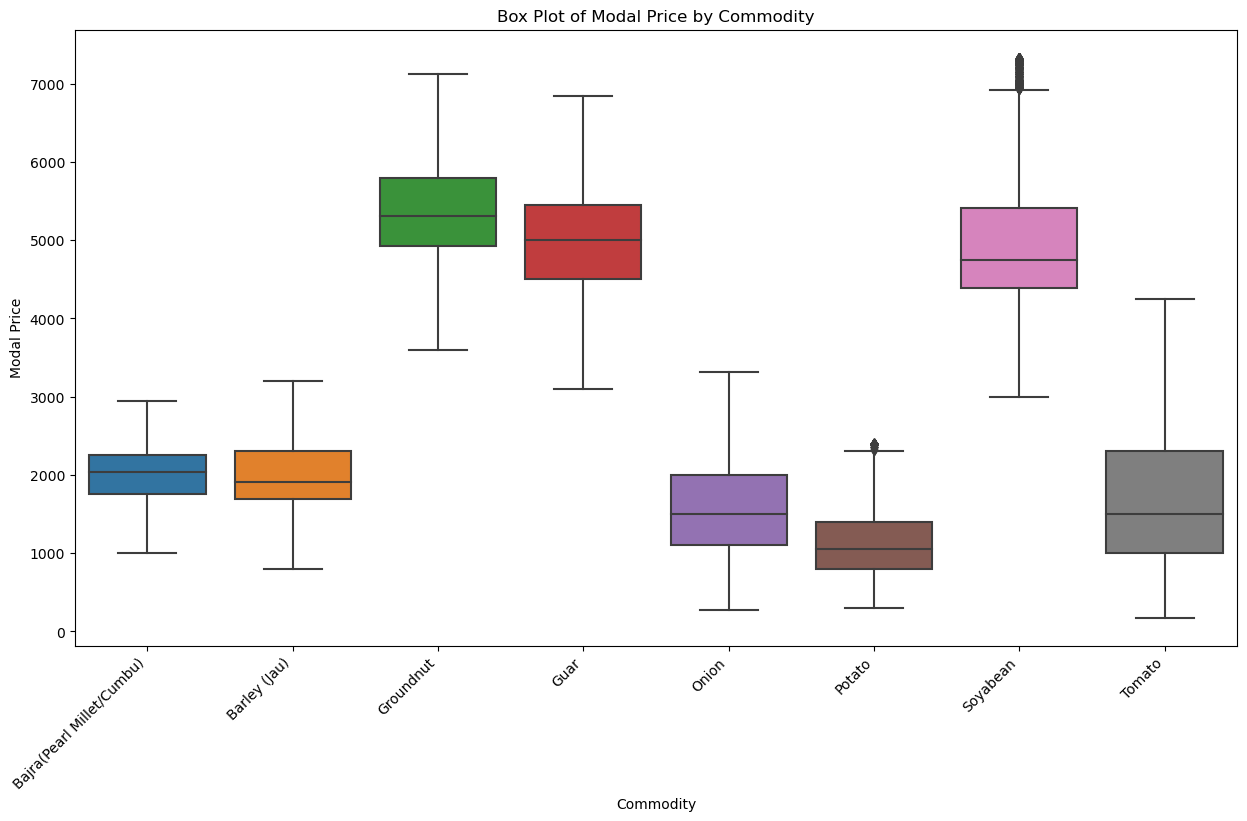

In [23]:
# Box plots grouped by Commodity of df_filtered second iteration
plt.figure(figsize=(15, 8))
sns.boxplot(x='Commodity', y='Modal Price', data=df_filtered)
plt.title('Box Plot of Modal Price by Commodity')
plt.xticks(rotation=45, ha='right') #rotate x axis labels.
file_path = os.path.join(folder_path, 'modal_price_boxplot_grouped_by_commodity_after_removal_second iteration.png')
plt.savefig(file_path)

plt.show()

In [24]:
df = df_filtered

In [25]:
# Third iteration of oulier removal commodity-wise

# Create a list to store the indices of rows to be dropped
outlier_indices_to_drop = []

# IQR method to identify outliner that needs to be drop (grouped by commodity in df) and .
for commodity in df['Commodity'].unique():
    subset = df[df['Commodity'] == commodity]
    Q1_com = subset['Modal Price'].quantile(0.25)
    Q3_com = subset['Modal Price'].quantile(0.75)
    IQR_com = Q3_com - Q1_com
    
    # Find the outliers (rows to be removed)
    outliers_com = subset[(subset['Modal Price'] < Q1_com - 1.5 * IQR_com) | (subset['Modal Price'] > Q3_com + 1.5 * IQR_com)]

    # Append the indices of outliers to the list
    outlier_indices_to_drop.extend(outliers_com.index)

# Remove the outliers from the DataFrame
df_filtered = df_filtered.drop(outlier_indices_to_drop)

# Reset the index of the DataFrame
df_filtered = df_filtered.reset_index(drop=True)

In [26]:
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)  # Should have fewer rows
print(df_filtered['Commodity'].unique())  # Check if all commodities are present

Original DataFrame shape: (209596, 8)
Filtered DataFrame shape: (208748, 8)
['Bajra(Pearl Millet/Cumbu)' 'Barley (Jau)' 'Groundnut' 'Guar' 'Onion'
 'Potato' 'Soyabean' 'Tomato']


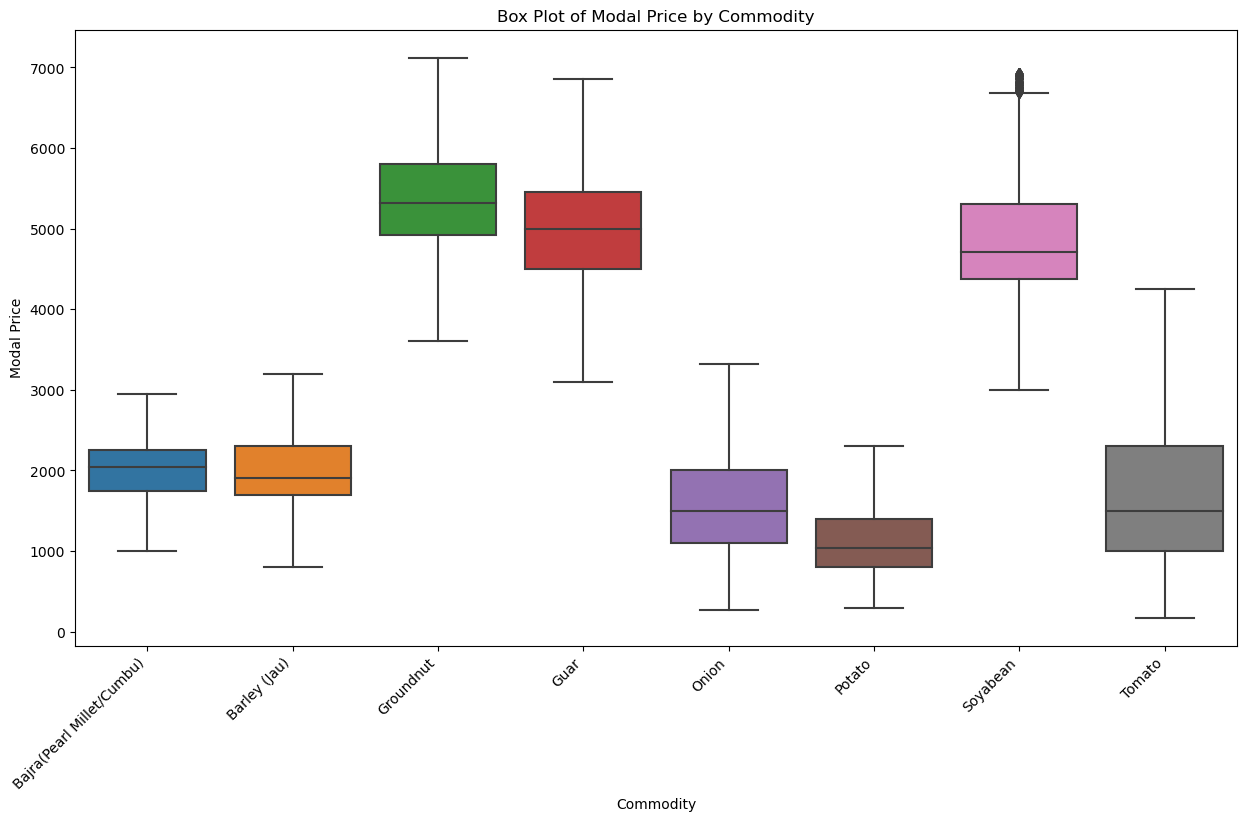

In [27]:
# Box plots grouped by Commodity of df_filtered second iteration
plt.figure(figsize=(15, 8))
sns.boxplot(x='Commodity', y='Modal Price', data=df_filtered)
plt.title('Box Plot of Modal Price by Commodity')
plt.xticks(rotation=45, ha='right') #rotate x axis labels.
file_path = os.path.join(folder_path, 'modal_price_boxplot_grouped_by_commodity_after_removal_third iteration.png')
plt.savefig(file_path)

plt.show()

In [28]:
df = df_filtered

Original DataFrame shape: (208748, 8)
Filtered DataFrame shape: (208349, 8)
['Bajra(Pearl Millet/Cumbu)' 'Barley (Jau)' 'Groundnut' 'Guar' 'Onion'
 'Potato' 'Soyabean' 'Tomato']


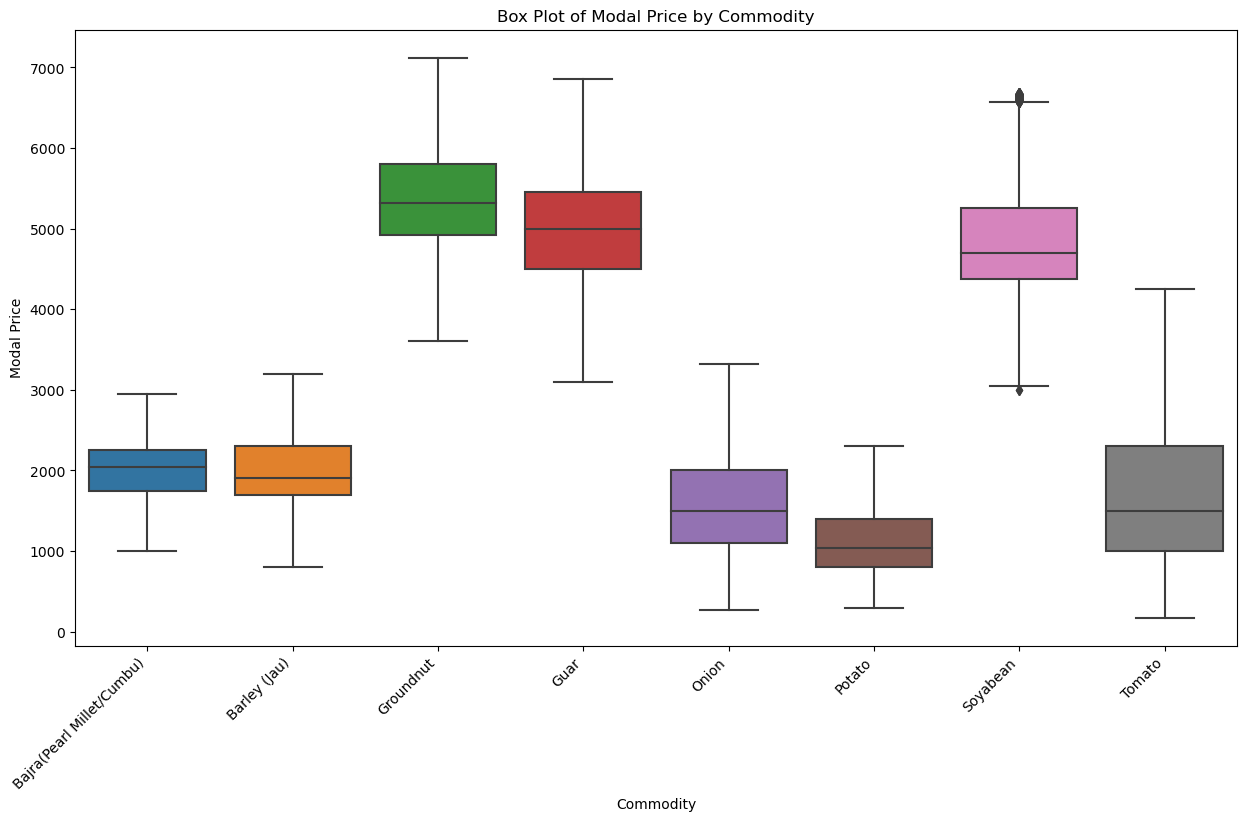

In [29]:
# 4th iteration of oulier removal commodity-wise

# Create a list to store the indices of rows to be dropped
outlier_indices_to_drop = []

# IQR method to identify outliner that needs to be drop (grouped by commodity in df) and .
for commodity in df['Commodity'].unique():
    subset = df[df['Commodity'] == commodity]
    Q1_com = subset['Modal Price'].quantile(0.25)
    Q3_com = subset['Modal Price'].quantile(0.75)
    IQR_com = Q3_com - Q1_com
    
    # Find the outliers (rows to be removed)
    outliers_com = subset[(subset['Modal Price'] < Q1_com - 1.5 * IQR_com) | (subset['Modal Price'] > Q3_com + 1.5 * IQR_com)]

    # Append the indices of outliers to the list
    outlier_indices_to_drop.extend(outliers_com.index)

# Remove the outliers from the DataFrame
df_filtered = df_filtered.drop(outlier_indices_to_drop)

# Reset the index of the DataFrame
df_filtered = df_filtered.reset_index(drop=True)

print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)  # Should have fewer rows
print(df_filtered['Commodity'].unique())  # Check if all commodities are present

# Box plots grouped by Commodity of df_filtered second iteration
plt.figure(figsize=(15, 8))
sns.boxplot(x='Commodity', y='Modal Price', data=df_filtered)
plt.title('Box Plot of Modal Price by Commodity')
plt.xticks(rotation=45, ha='right') #rotate x axis labels.
file_path = os.path.join(folder_path, 'modal_price_boxplot_grouped_by_commodity_after_removal_4th iteration.png')
plt.savefig(file_path)

plt.show()

In [30]:
df = df_filtered

Original DataFrame shape: (208349, 8)
Filtered DataFrame shape: (208166, 8)
['Bajra(Pearl Millet/Cumbu)' 'Barley (Jau)' 'Groundnut' 'Guar' 'Onion'
 'Potato' 'Soyabean' 'Tomato']


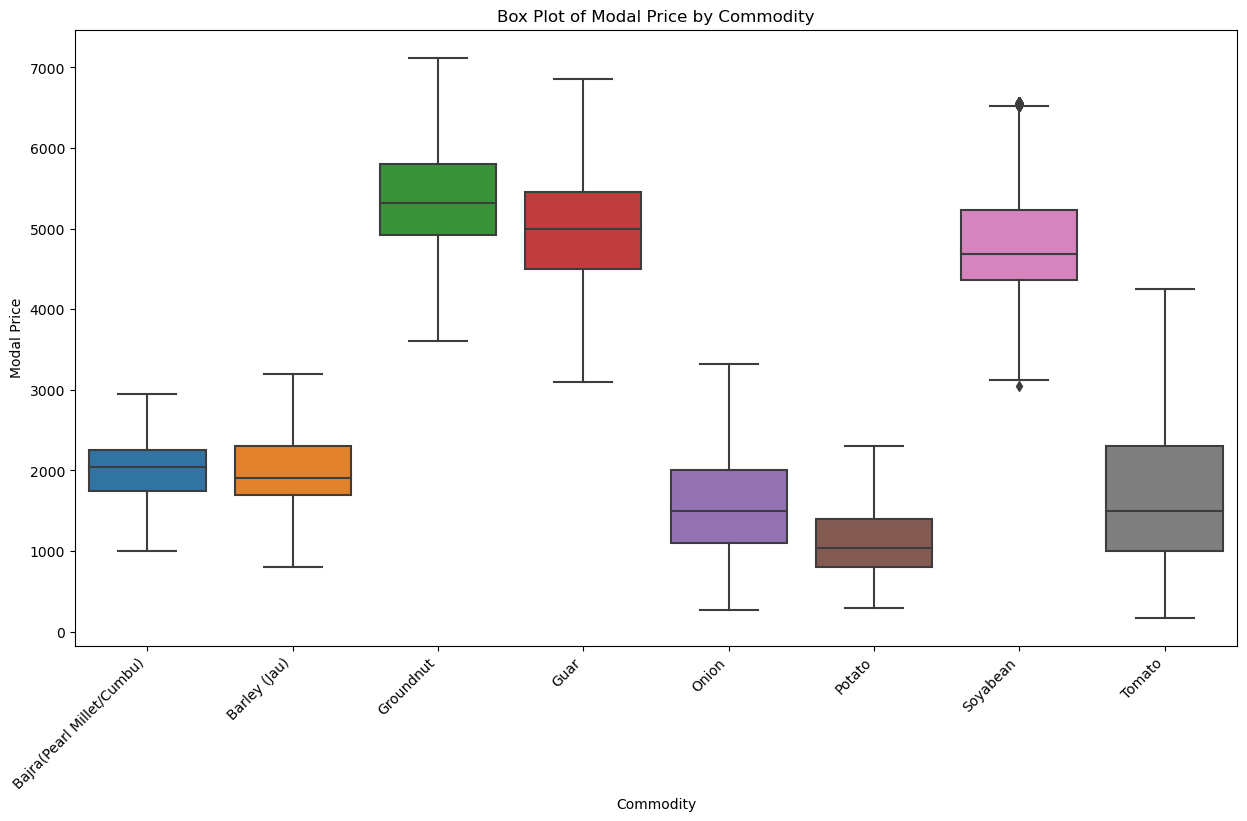

In [31]:
# 5th iteration of oulier removal commodity-wise

# Create a list to store the indices of rows to be dropped
outlier_indices_to_drop = []

# IQR method to identify outliner that needs to be drop (grouped by commodity in df) and .
for commodity in df['Commodity'].unique():
    subset = df[df['Commodity'] == commodity]
    Q1_com = subset['Modal Price'].quantile(0.25)
    Q3_com = subset['Modal Price'].quantile(0.75)
    IQR_com = Q3_com - Q1_com
    
    # Find the outliers (rows to be removed)
    outliers_com = subset[(subset['Modal Price'] < Q1_com - 1.5 * IQR_com) | (subset['Modal Price'] > Q3_com + 1.5 * IQR_com)]

    # Append the indices of outliers to the list
    outlier_indices_to_drop.extend(outliers_com.index)

# Remove the outliers from the DataFrame
df_filtered = df_filtered.drop(outlier_indices_to_drop)

# Reset the index of the DataFrame
df_filtered = df_filtered.reset_index(drop=True)

print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)  # Should have fewer rows
print(df_filtered['Commodity'].unique())  # Check if all commodities are present

# Box plots grouped by Commodity of df_filtered second iteration
plt.figure(figsize=(15, 8))
sns.boxplot(x='Commodity', y='Modal Price', data=df_filtered)
plt.title('Box Plot of Modal Price by Commodity')
plt.xticks(rotation=45, ha='right') #rotate x axis labels.
file_path = os.path.join(folder_path, 'modal_price_boxplot_grouped_by_commodity_after_removal_5th iteration.png')
plt.savefig(file_path)

plt.show()

In [32]:
df = df_filtered

Original DataFrame shape: (208166, 8)
Filtered DataFrame shape: (208076, 8)
['Bajra(Pearl Millet/Cumbu)' 'Barley (Jau)' 'Groundnut' 'Guar' 'Onion'
 'Potato' 'Soyabean' 'Tomato']


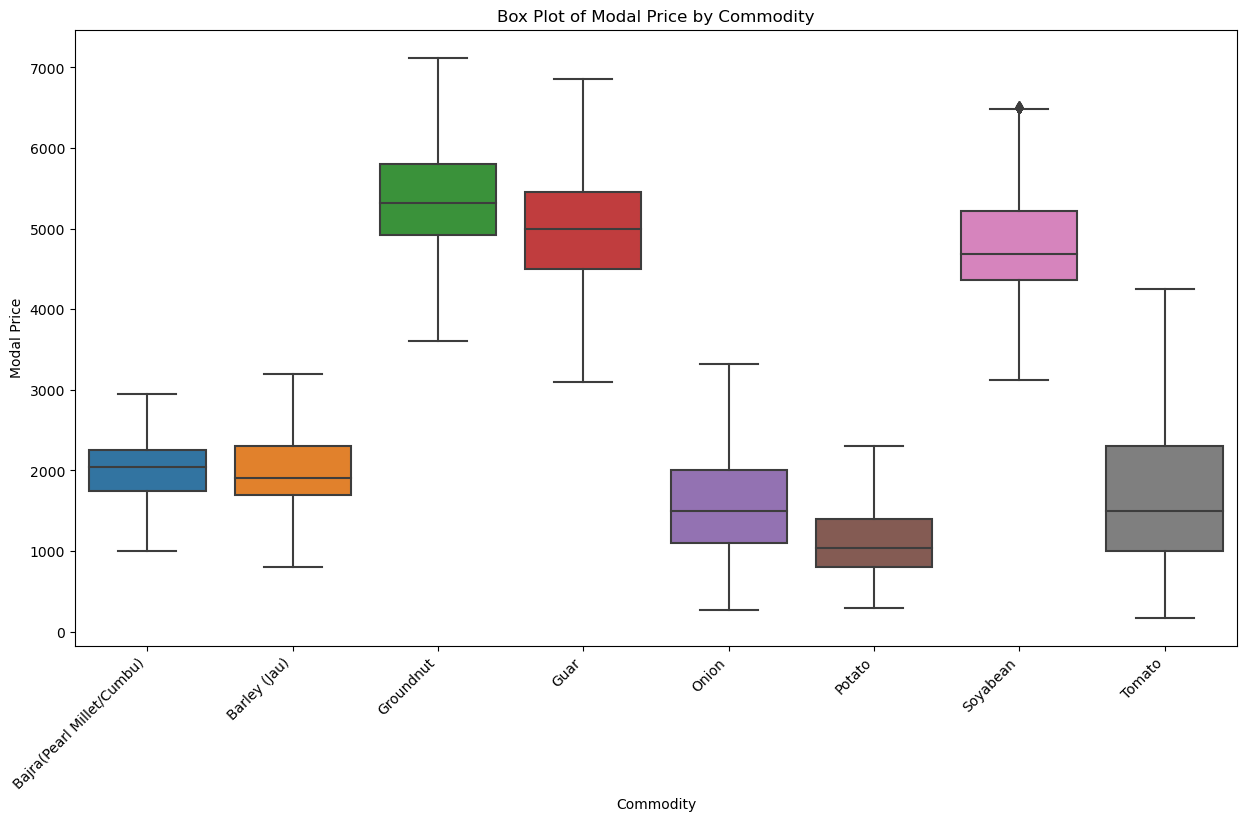

In [33]:
# 6th iteration of oulier removal commodity-wise

# Create a list to store the indices of rows to be dropped
outlier_indices_to_drop = []

# IQR method to identify outliner that needs to be drop (grouped by commodity in df) and .
for commodity in df['Commodity'].unique():
    subset = df[df['Commodity'] == commodity]
    Q1_com = subset['Modal Price'].quantile(0.25)
    Q3_com = subset['Modal Price'].quantile(0.75)
    IQR_com = Q3_com - Q1_com
    
    # Find the outliers (rows to be removed)
    outliers_com = subset[(subset['Modal Price'] < Q1_com - 1.5 * IQR_com) | (subset['Modal Price'] > Q3_com + 1.5 * IQR_com)]

    # Append the indices of outliers to the list
    outlier_indices_to_drop.extend(outliers_com.index)

# Remove the outliers from the DataFrame
df_filtered = df_filtered.drop(outlier_indices_to_drop)

# Reset the index of the DataFrame
df_filtered = df_filtered.reset_index(drop=True)

print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)  # Should have fewer rows
print(df_filtered['Commodity'].unique())  # Check if all commodities are present

# Box plots grouped by Commodity of df_filtered second iteration
plt.figure(figsize=(15, 8))
sns.boxplot(x='Commodity', y='Modal Price', data=df_filtered)
plt.title('Box Plot of Modal Price by Commodity')
plt.xticks(rotation=45, ha='right') #rotate x axis labels.
file_path = os.path.join(folder_path, 'modal_price_boxplot_grouped_by_commodity_after_removal_6th iteration.png')
plt.savefig(file_path)

plt.show()

In [34]:
df = df_filtered

Original DataFrame shape: (208076, 8)
Filtered DataFrame shape: (207960, 8)
['Bajra(Pearl Millet/Cumbu)' 'Barley (Jau)' 'Groundnut' 'Guar' 'Onion'
 'Potato' 'Soyabean' 'Tomato']


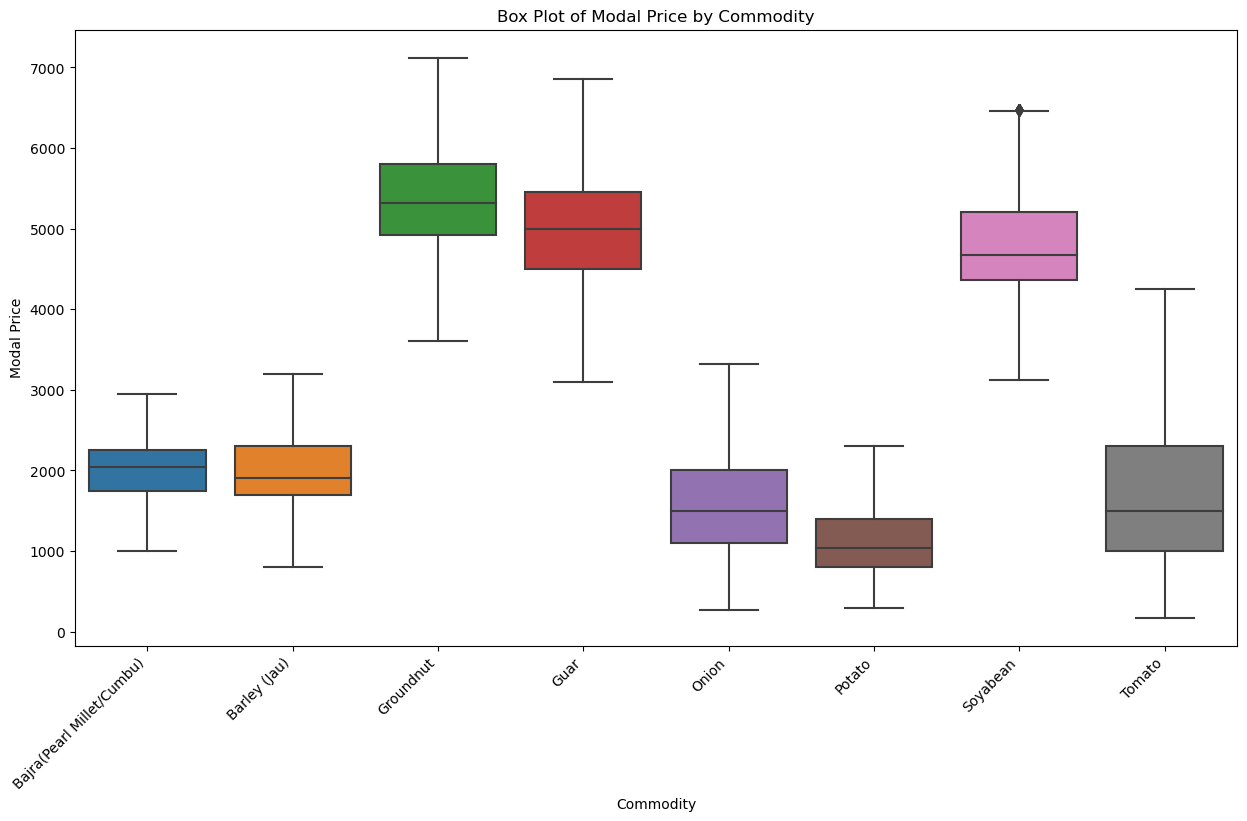

In [35]:
# 7th iteration of oulier removal commodity-wise

# Create a list to store the indices of rows to be dropped
outlier_indices_to_drop = []

# IQR method to identify outliner that needs to be drop (grouped by commodity in df) and .
for commodity in df['Commodity'].unique():
    subset = df[df['Commodity'] == commodity]
    Q1_com = subset['Modal Price'].quantile(0.25)
    Q3_com = subset['Modal Price'].quantile(0.75)
    IQR_com = Q3_com - Q1_com
    
    # Find the outliers (rows to be removed)
    outliers_com = subset[(subset['Modal Price'] < Q1_com - 1.5 * IQR_com) | (subset['Modal Price'] > Q3_com + 1.5 * IQR_com)]

    # Append the indices of outliers to the list
    outlier_indices_to_drop.extend(outliers_com.index)

# Remove the outliers from the DataFrame
df_filtered = df_filtered.drop(outlier_indices_to_drop)

# Reset the index of the DataFrame
df_filtered = df_filtered.reset_index(drop=True)

print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)  # Should have fewer rows
print(df_filtered['Commodity'].unique())  # Check if all commodities are present

# Box plots grouped by Commodity of df_filtered second iteration
plt.figure(figsize=(15, 8))
sns.boxplot(x='Commodity', y='Modal Price', data=df_filtered)
plt.title('Box Plot of Modal Price by Commodity')
plt.xticks(rotation=45, ha='right') #rotate x axis labels.
file_path = os.path.join(folder_path, 'modal_price_boxplot_grouped_by_commodity_after_removal_7th iteration.png')
plt.savefig(file_path)

plt.show()

In [36]:
df = df_filtered

Original DataFrame shape: (207960, 8)
Filtered DataFrame shape: (207922, 8)
['Bajra(Pearl Millet/Cumbu)' 'Barley (Jau)' 'Groundnut' 'Guar' 'Onion'
 'Potato' 'Soyabean' 'Tomato']


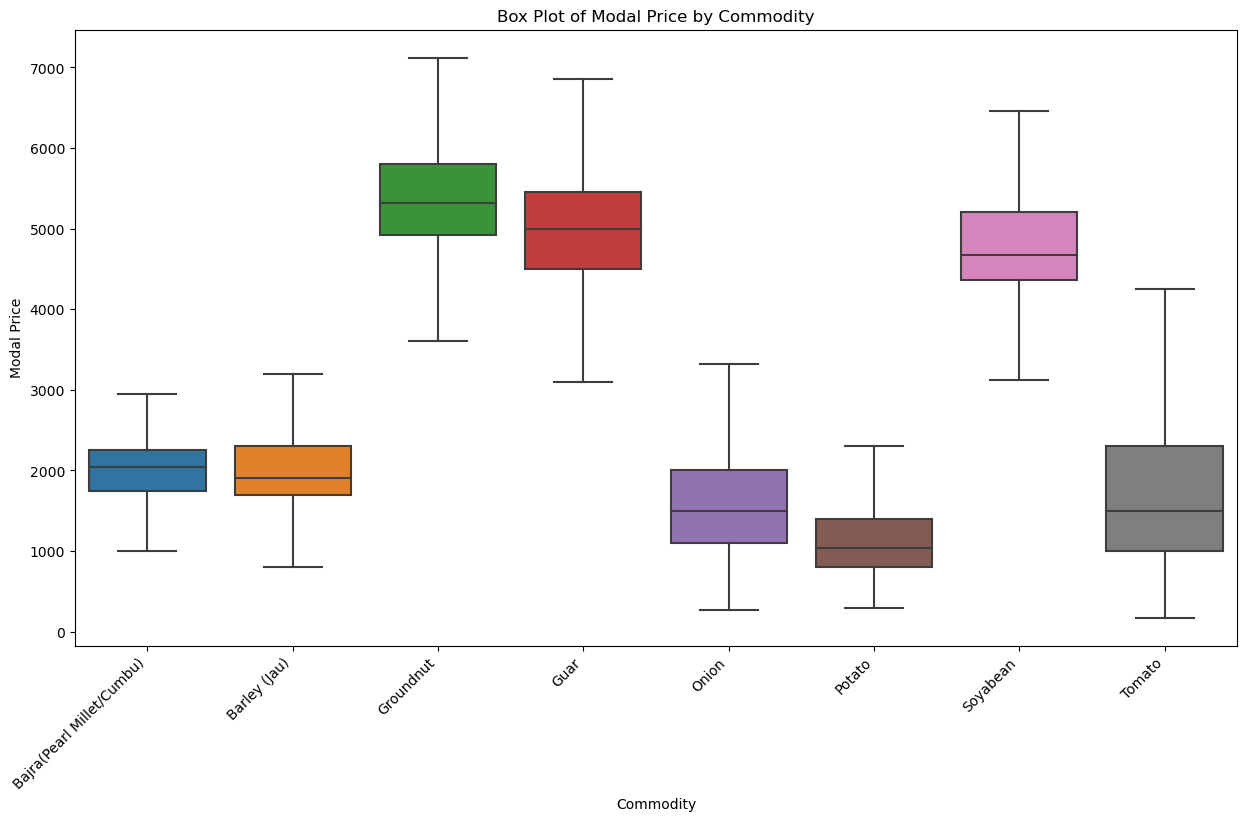

In [37]:
# 8th iteration of oulier removal commodity-wise

# Create a list to store the indices of rows to be dropped
outlier_indices_to_drop = []

# IQR method to identify outliner that needs to be drop (grouped by commodity in df) and .
for commodity in df['Commodity'].unique():
    subset = df[df['Commodity'] == commodity]
    Q1_com = subset['Modal Price'].quantile(0.25)
    Q3_com = subset['Modal Price'].quantile(0.75)
    IQR_com = Q3_com - Q1_com
    
    # Find the outliers (rows to be removed)
    outliers_com = subset[(subset['Modal Price'] < Q1_com - 1.5 * IQR_com) | (subset['Modal Price'] > Q3_com + 1.5 * IQR_com)]

    # Append the indices of outliers to the list
    outlier_indices_to_drop.extend(outliers_com.index)

# Remove the outliers from the DataFrame
df_filtered = df_filtered.drop(outlier_indices_to_drop)

# Reset the index of the DataFrame
df_filtered = df_filtered.reset_index(drop=True)

print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)  # Should have fewer rows
print(df_filtered['Commodity'].unique())  # Check if all commodities are present

# Box plots grouped by Commodity of df_filtered second iteration
plt.figure(figsize=(15, 8))
sns.boxplot(x='Commodity', y='Modal Price', data=df_filtered)
plt.title('Box Plot of Modal Price by Commodity')
plt.xticks(rotation=45, ha='right') #rotate x axis labels.
file_path = os.path.join(folder_path, 'modal_price_boxplot_grouped_by_commodity_after_removal_8th iteration.png')
plt.savefig(file_path)

plt.show()

In [38]:
df = df_filtered

Original DataFrame shape: (207922, 8)
Filtered DataFrame shape: (207922, 8)
['Bajra(Pearl Millet/Cumbu)' 'Barley (Jau)' 'Groundnut' 'Guar' 'Onion'
 'Potato' 'Soyabean' 'Tomato']


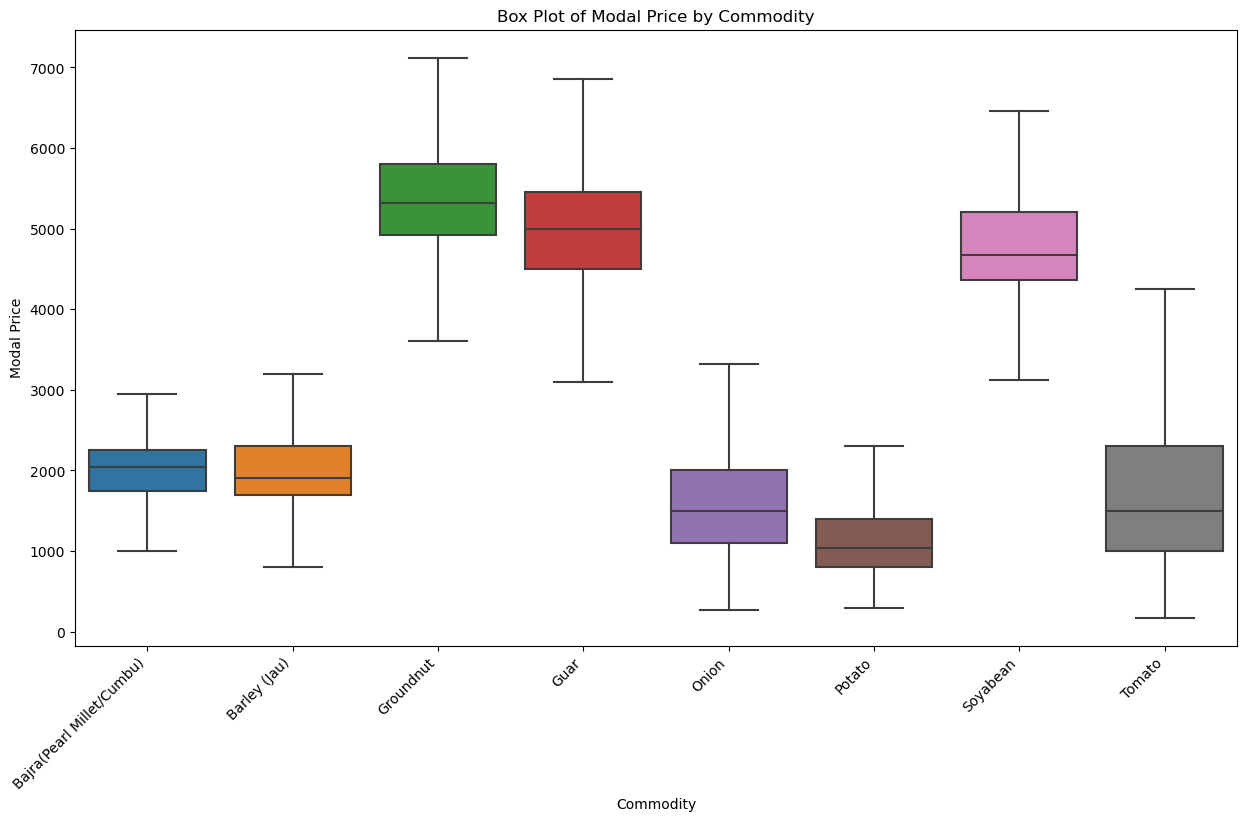

In [39]:
# 9th iteration of oulier removal commodity-wise

# Create a list to store the indices of rows to be dropped
outlier_indices_to_drop = []

# IQR method to identify outliner that needs to be drop (grouped by commodity in df) and .
for commodity in df['Commodity'].unique():
    subset = df[df['Commodity'] == commodity]
    Q1_com = subset['Modal Price'].quantile(0.25)
    Q3_com = subset['Modal Price'].quantile(0.75)
    IQR_com = Q3_com - Q1_com
    
    # Find the outliers (rows to be removed)
    outliers_com = subset[(subset['Modal Price'] < Q1_com - 1.5 * IQR_com) | (subset['Modal Price'] > Q3_com + 1.5 * IQR_com)]

    # Append the indices of outliers to the list
    outlier_indices_to_drop.extend(outliers_com.index)

# Remove the outliers from the DataFrame
df_filtered = df_filtered.drop(outlier_indices_to_drop)

# Reset the index of the DataFrame
df_filtered = df_filtered.reset_index(drop=True)

print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)  # Should have fewer rows
print(df_filtered['Commodity'].unique())  # Check if all commodities are present

# Box plots grouped by Commodity of df_filtered second iteration
plt.figure(figsize=(15, 8))
sns.boxplot(x='Commodity', y='Modal Price', data=df_filtered)
plt.title('Box Plot of Modal Price by Commodity')
plt.xticks(rotation=45, ha='right') #rotate x axis labels.
file_path = os.path.join(folder_path, 'modal_price_boxplot_grouped_by_commodity_after_removal_9th iteration.png')
plt.savefig(file_path)

plt.show()

In [40]:
df = df_filtered

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207922 entries, 0 to 207921
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   District Name  207922 non-null  object 
 1   Market Name    207922 non-null  object 
 2   Commodity      207922 non-null  object 
 3   Variety        207922 non-null  object 
 4   Modal Price    207922 non-null  float64
 5   Month          207922 non-null  object 
 6   Day            207922 non-null  object 
 7   Season         207922 non-null  object 
dtypes: float64(1), object(7)
memory usage: 12.7+ MB


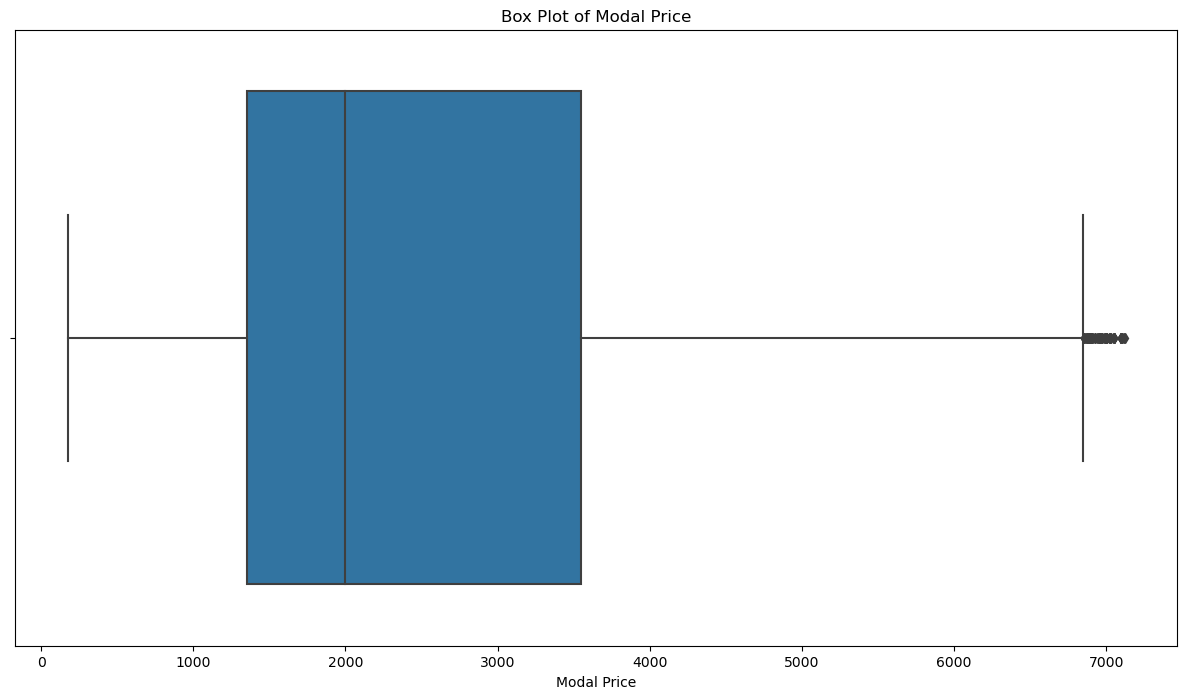

In [42]:
# Box plots for outliers identification using 'model price' column
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
sns.boxplot(x=df['Modal Price'])
plt.title('Box Plot of Modal Price')
file_path = os.path.join(folder_path, 'modal_price_boxplot_before_removal.png')
plt.savefig(file_path)


plt.show()

In [43]:
#Calculate Q1 and Q3 (Quartiles)
Q1 = df['Modal Price'].quantile(0.25)  # 25th percentile
Q3 = df['Modal Price'].quantile(0.75)  # 75th percentile

In [44]:
#Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

In [45]:
#Define the Lower and Upper Bounds for Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [46]:
#Filter the DataFrame to Remove Outliers
df_no_outliers = df[(df['Modal Price'] >= lower_bound) & (df['Modal Price'] <= upper_bound)]

In [47]:
#Verify the Outlier Removal
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

Original DataFrame shape: (207922, 8)
DataFrame shape after removing outliers: (207785, 8)


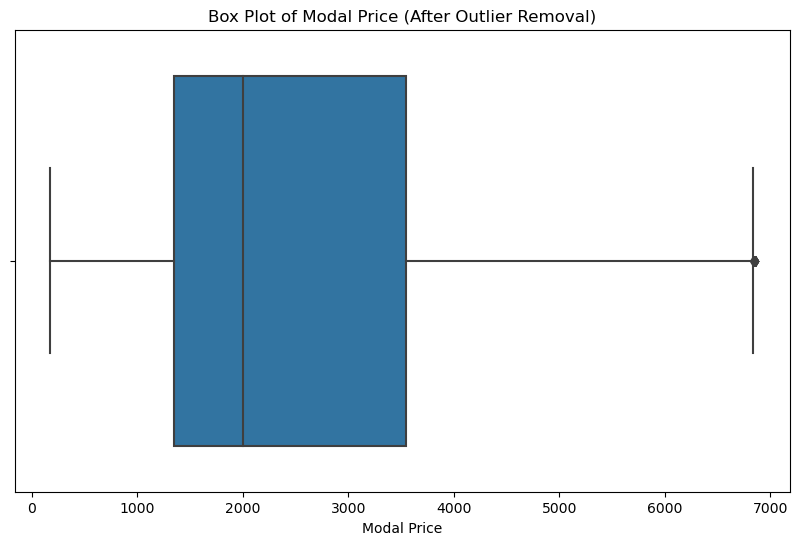

In [48]:
#Create a Box Plot to Visualize the Change
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['Modal Price'])
plt.title('Box Plot of Modal Price (After Outlier Removal)')
file_path = os.path.join(folder_path, 'modal_price_boxplot_After_removal_first iteration.png')
plt.savefig(file_path)
plt.show()

In [49]:
df=df_no_outliers

In [50]:
#outlier removal second iteration
#Calculate Q1 and Q3 (Quartiles)
Q1 = df['Modal Price'].quantile(0.25)  # 25th percentile
Q3 = df['Modal Price'].quantile(0.75)  # 75th percentile

#Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

#Define the Lower and Upper Bounds for Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter the DataFrame to Remove Outliers
df_no_outliers = df[(df['Modal Price'] >= lower_bound) & (df['Modal Price'] <= upper_bound)]

#Verify the Outlier Removal
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

Original DataFrame shape: (207785, 8)
DataFrame shape after removing outliers: (207773, 8)


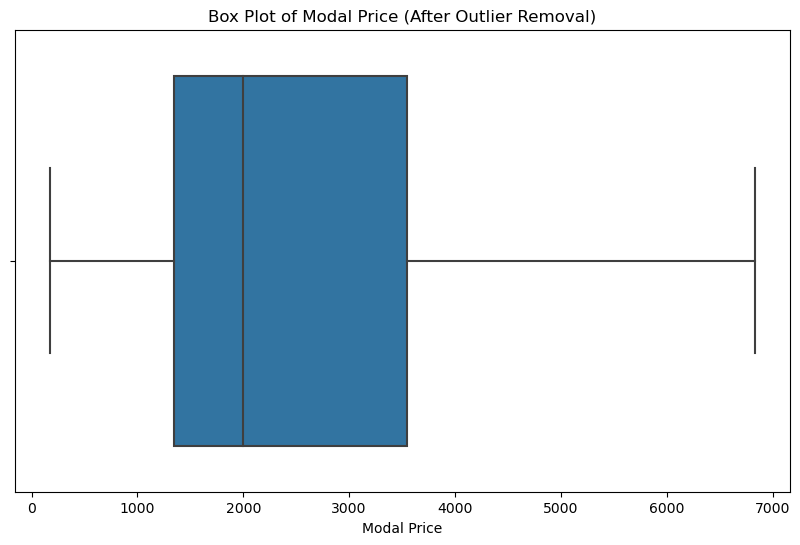

In [51]:
#Create a Box Plot to Visualize the Change
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['Modal Price'])
plt.title('Box Plot of Modal Price (After Outlier Removal)')
file_path = os.path.join(folder_path, 'modal_price_boxplot_After_removal_second_iteration.png')
plt.savefig(file_path)
plt.show()

In [52]:
df=df_no_outliers

In [53]:
#outlier removal Third iteration
#Calculate Q1 and Q3 (Quartiles)
Q1 = df['Modal Price'].quantile(0.25)  # 25th percentile
Q3 = df['Modal Price'].quantile(0.75)  # 75th percentile

#Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

#Define the Lower and Upper Bounds for Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter the DataFrame to Remove Outliers
df_no_outliers = df[(df['Modal Price'] >= lower_bound) & (df['Modal Price'] <= upper_bound)]

#Verify the Outlier Removal
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

Original DataFrame shape: (207773, 8)
DataFrame shape after removing outliers: (207773, 8)


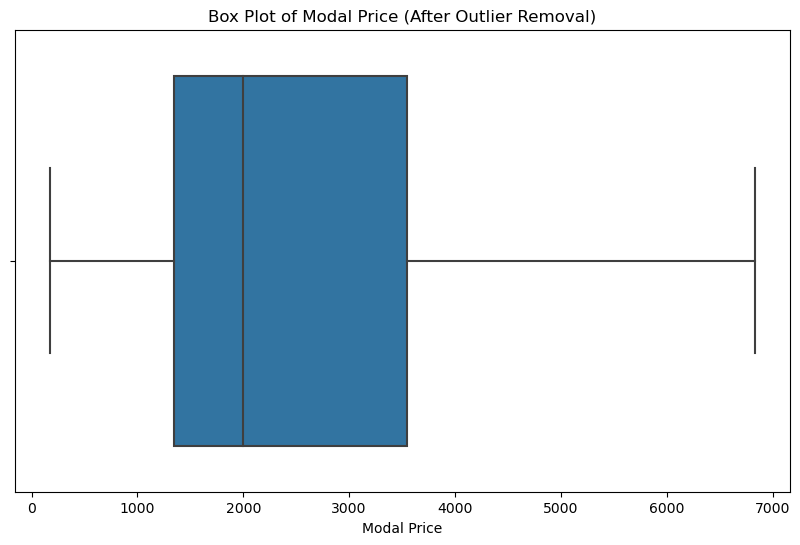

In [54]:
#Create a Box Plot to Visualize the Change
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['Modal Price'])
plt.title('Box Plot of Modal Price (After Outlier Removal)')
file_path = os.path.join(folder_path, 'modal_price_boxplot_After_removal_third_iteration.png')
plt.savefig(file_path)
plt.show()

In [55]:
df=df_no_outliers

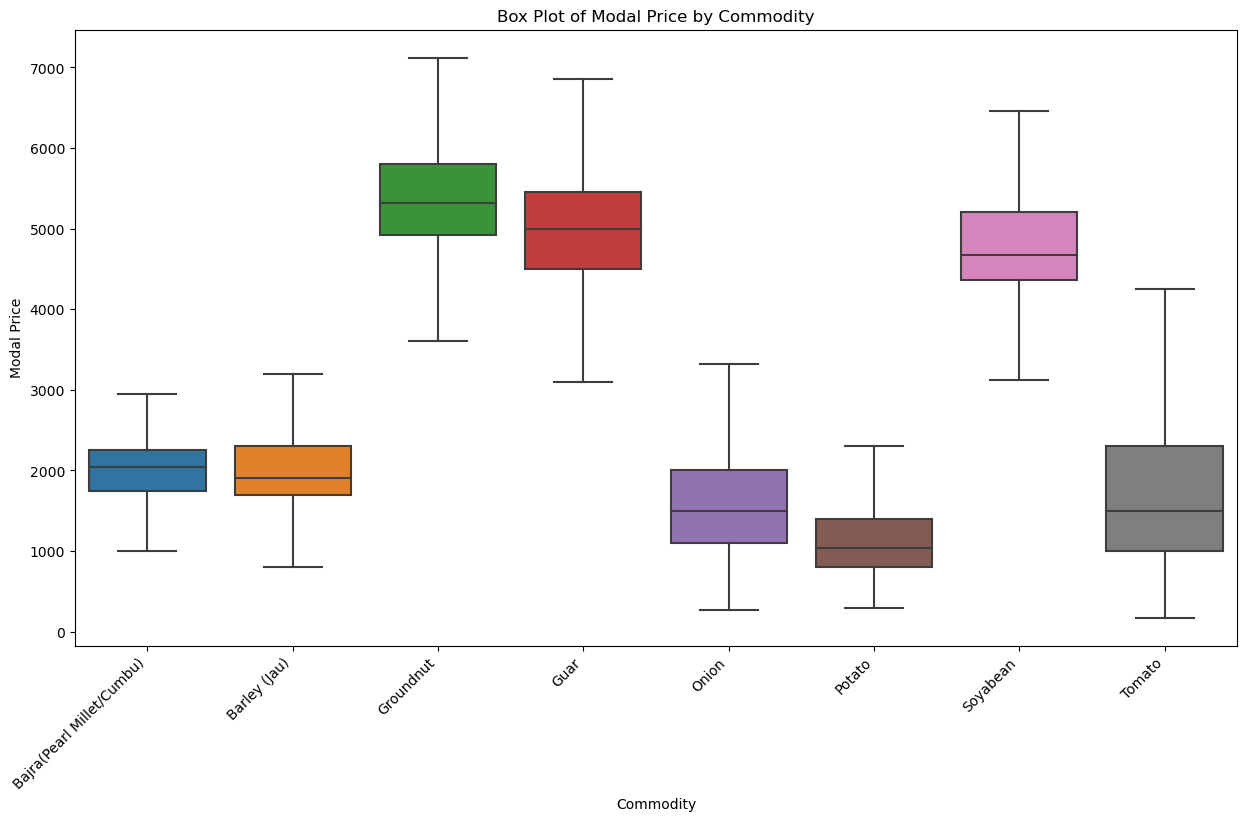

In [56]:
# Box plots grouped by Commodity of df
plt.figure(figsize=(15, 8))
sns.boxplot(x='Commodity', y='Modal Price', data=df_filtered)
plt.title('Box Plot of Modal Price by Commodity')
plt.xticks(rotation=45, ha='right') #rotate x axis labels.
file_path = os.path.join(folder_path, 'modal_price_boxplot_grouped_by_commodity_Final.png')
plt.savefig(file_path)

plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207773 entries, 0 to 207921
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   District Name  207773 non-null  object 
 1   Market Name    207773 non-null  object 
 2   Commodity      207773 non-null  object 
 3   Variety        207773 non-null  object 
 4   Modal Price    207773 non-null  float64
 5   Month          207773 non-null  object 
 6   Day            207773 non-null  object 
 7   Season         207773 non-null  object 
dtypes: float64(1), object(7)
memory usage: 14.3+ MB


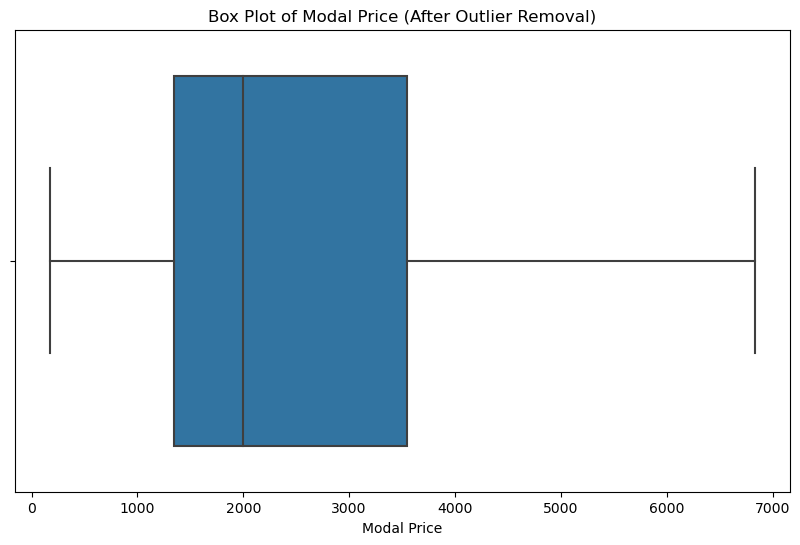

In [58]:
#Create a Box Plot to Visualize the Change
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Modal Price'])
plt.title('Box Plot of Modal Price (After Outlier Removal)')
file_path = os.path.join(folder_path, 'modal_price_boxplot_final.png')
plt.savefig(file_path)
plt.show()

In [59]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207773 entries, 0 to 207921
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   District Name  207773 non-null  object 
 1   Market Name    207773 non-null  object 
 2   Commodity      207773 non-null  object 
 3   Variety        207773 non-null  object 
 4   Modal Price    207773 non-null  float64
 5   Month          207773 non-null  object 
 6   Day            207773 non-null  object 
 7   Season         207773 non-null  object 
dtypes: float64(1), object(7)
memory usage: 14.3+ MB


In [60]:
df.shape

(207773, 8)

In [61]:
data1 = df.copy()

In [62]:
data1.to_excel('Processed_data.xlsx', index=False)

In [70]:
df = data1

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207773 entries, 0 to 207921
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   District Name  207773 non-null  object 
 1   Market Name    207773 non-null  object 
 2   Commodity      207773 non-null  object 
 3   Variety        207773 non-null  object 
 4   Modal Price    207773 non-null  float64
 5   Month          207773 non-null  object 
 6   Day            207773 non-null  object 
 7   Season         207773 non-null  object 
dtypes: float64(1), object(7)
memory usage: 14.3+ MB


In [72]:
df_encode = df.copy()
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207773 entries, 0 to 207921
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   District Name  207773 non-null  object 
 1   Market Name    207773 non-null  object 
 2   Commodity      207773 non-null  object 
 3   Variety        207773 non-null  object 
 4   Modal Price    207773 non-null  float64
 5   Month          207773 non-null  object 
 6   Day            207773 non-null  object 
 7   Season         207773 non-null  object 
dtypes: float64(1), object(7)
memory usage: 14.3+ MB


In [73]:
dist=(df_encode['Commodity'])
distset=set(dist)
dd= list(distset)
dictOfWords = {dd[i] : i for i in range(0, len(dd))}
df_encode['Commodity'] = df_encode['Commodity'].map(dictOfWords)

# Print the mapping list
print("Commodity Mapping:")
for commodity, number in dictOfWords.items():
    print(f"{commodity}: {number}")

joblib.dump(dictOfWords, 'commodity_mapping.joblib')

Commodity Mapping:
Groundnut: 0
Barley (Jau): 1
Potato: 2
Soyabean: 3
Onion: 4
Bajra(Pearl Millet/Cumbu): 5
Guar: 6
Tomato: 7


['commodity_mapping.joblib']

In [74]:
dist=(df_encode['District Name'])
distset=set(dist)
dd= list(distset)
dictOfWords = {dd[i] : i for i in range(0, len(dd))}
df_encode['District Name'] = df_encode['District Name'].map(dictOfWords)

# Print the mapping list
print("District Name Mapping:")
for District_Name, number in dictOfWords.items():
    print(f"{District_Name}: {number}")
    
joblib.dump(dictOfWords, 'District_mapping.joblib')

District Name Mapping:
Sikar: 0
Sirohi: 1
Kotputli- Behror: 2
Nagaur: 3
Dungarpur: 4
Bundi: 5
Jhunjhunu: 6
Deeg: 7
Bharatpur: 8
Jodhpur: 9
Ajmer: 10
Jaipur Rural: 11
Karauli: 12
Jhalawar: 13
Tonk: 14
Gangapur City: 15
Bhilwara: 16
Pratapgarh: 17
Phalodi: 18
Bikaner: 19
Alwar: 20
Jaipur: 21
Barmer: 22
Churu: 23
Dausa: 24
Neem Ka Thana: 25
Jalore: 26
Sanchore: 27
Dudu: 28
Jaisalmer: 29
Hanumangarh: 30
Kekri: 31
Kota: 32
Rajsamand: 33
Dholpur: 34
Deedwana Kuchaman: 35
Chittorgarh: 36
Baran: 37
Anupgarh: 38
Ganganagar: 39
Khairthal Tijara: 40
Pali: 41
Udaipur: 42
Jodhpur Rural: 43
Beawar: 44
Swai Madhopur: 45
Balotra: 46


['District_mapping.joblib']

In [75]:
dist=(df_encode['Market Name'])
distset=set(dist)
dd= list(distset)
dictOfWords = {dd[i] : i for i in range(0, len(dd))}
df_encode['Market Name'] = df_encode['Market Name'].map(dictOfWords)

# Print the mapping list
print("District Name Mapping:")
for Market_Name, number in dictOfWords.items():
    print(f"{Market_Name}: {number}")

joblib.dump(dictOfWords, 'Market_mapping.joblib')

District Name Mapping:
Udaipur (F&V): 0
Lunkaransar: 1
Nadwai: 2
Kota (F&V): 3
Chhipabarod (Chhabra): 4
Deeg: 5
Kumher: 6
Uniyara: 7
Bandikui: 8
Kishangarh Renwal: 9
Kesarisinghpur: 10
Sojat Road: 11
Tonk: 12
Pratapgarh: 13
Alwar: 14
Bagru: 15
Nohar: 16
Merta City: 17
Bahror: 18
Dudu: 19
Sri Vijayanagar: 20
Sambhar (Kishangarh renwal): 21
Ajmer (Grain): 22
Dholpur: 23
Deedwana: 24
Hanumangarh Town: 25
Gangapur: 26
Dooni: 27
Chittorgarh: 28
Laxmangarh (Barodamev): 29
Nagaur(Jayal): 30
Nagar: 31
Tibbi: 32
Madanganj Mahuwa: 33
Ridmalsar: 34
Pilibanga: 35
Madanganj Kishangarh: 36
Sri Karanpur: 37
Pugal Road (Grain): 38
Sri Madhopur: 39
Sriganganagar (Grain): 40
Bayana: 41
Sawai Madhopur: 42
Nagaur: 43
Tijara: 44
Lalsot: 45
Kuchaman City: 46
Baparwarkala (Kota) (Grain): 47
Manohar Thana: 48
Bikaner (Grain): 49
Padampur: 50
Ositan Mathania: 51
Chhotisadri: 52
Madanganj Mandawar: 53
Vijaynagar: 54
Bharatpur: 55
Nawalgarh: 56
Sridungargarh: 57
Bhawani Mandi: 58
Dag: 59
Itawa: 60
Khandar: 61
Bh

['Market_mapping.joblib']

In [76]:
dist=(df_encode['Season'])
distset=set(dist)
dd= list(distset)
dictOfWords = {dd[i] : i for i in range(0, len(dd))}
df_encode['Season'] = df_encode['Season'].map(dictOfWords)

# Print the mapping list
print("District Name Mapping:")
for Season, number in dictOfWords.items():
    print(f"{Season}: {number}")

joblib.dump(dictOfWords, 'Season_mapping.joblib')

District Name Mapping:
Other: 0
Kharif: 1
Rabi: 2


['Season_mapping.joblib']

In [77]:
dist=(df_encode['Variety'])
distset=set(dist)
dd= list(distset)
dictOfWords = {dd[i] : i for i in range(0, len(dd))}
df_encode['Variety'] = df_encode['Variety'].map(dictOfWords)

# Print the mapping list
print("District Name Mapping:")
for Variety, number in dictOfWords.items():
    print(f"{Variety}: {number}")
    
joblib.dump(dictOfWords, 'Variety_mapping.joblib')

District Name Mapping:
Dara: 0
Beelary-Red: 1
Red Nanital: 2
Yellow: 3
Bold: 4
Balli/Habbu: 5
1st Sort: 6
White: 7
Local: 8
Black: 9
Hybrid: 10
Other: 11
Desi/Local: 12
Organic: 13
Gwar: 14


['Variety_mapping.joblib']

In [78]:
dist=(df_encode['Month'])
distset=set(dist)
dd= list(distset)
dictOfWords = {dd[i] : i for i in range(0, len(dd))}
df_encode['Month'] = df_encode['Month'].map(dictOfWords)

# Print the mapping list
print("District Name Mapping:")
for Month, number in dictOfWords.items():
    print(f"{Month}: {number}")

joblib.dump(dictOfWords, 'Month_mapping.joblib')

District Name Mapping:
October: 0
May: 1
November: 2
March: 3
June: 4
April: 5
September: 6
December: 7
July: 8
February: 9
January: 10
August: 11


['Month_mapping.joblib']

In [79]:
dist=(df_encode['Day'])
distset=set(dist)
dd= list(distset)
dictOfWords = {dd[i] : i for i in range(0, len(dd))}
df_encode['Day'] = df_encode['Day'].map(dictOfWords)

# Print the mapping list
print("District Name Mapping:")
for Day, number in dictOfWords.items():
    print(f"{Day}: {number}")
    
joblib.dump(dictOfWords, 'Day_mapping.joblib')

District Name Mapping:
Friday: 0
Thursday: 1
Tuesday: 2
Wednesday: 3
Monday: 4
Saturday: 5
Sunday: 6


['Day_mapping.joblib']

In [80]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207773 entries, 0 to 207921
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   District Name  207773 non-null  int64  
 1   Market Name    207773 non-null  int64  
 2   Commodity      207773 non-null  int64  
 3   Variety        207773 non-null  int64  
 4   Modal Price    207773 non-null  float64
 5   Month          207773 non-null  int64  
 6   Day            207773 non-null  int64  
 7   Season         207773 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 14.3 MB


In [81]:
df_encode.head()

,District Name,Market Name,Commodity,Variety,Modal Price,Month,Day,Season
0,10,22,5,11,1300.0,5,3,2
1,10,22,5,11,1300.0,3,1,0
2,10,22,5,11,1350.0,4,6,2
3,10,22,5,11,1350.0,8,1,0
4,10,22,5,11,1400.0,11,3,0


In [82]:
df_encode.columns

Index(['District Name', 'Market Name', 'Commodity', 'Variety', 'Modal Price',
       'Month', 'Day', 'Season'],
      dtype='object')

In [85]:
# Define Features (X) and Target (y):
X = df_encode[['District Name', 'Market Name', 'Commodity', 'Variety', 'Month', 'Day', 'Season']]  # Features
y = df_encode['Modal Price']             # Target variable

In [88]:
# Split Data into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [102]:
# Random Forest Regressor
model_regr = RandomForestRegressor(
    n_estimators=3000,
    max_depth=1000, #start with a smaller depth.
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1,
)
# Train the model
model_regr.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model_regr.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.8800362010262992

In [103]:
import joblib
# Save the model to a file
joblib.dump(model_regr, 'random_forest_model.joblib')

print("Model saved successfully!")

Model saved successfully!


In [121]:
df_encoded2 = df.copy()

In [122]:
df_encoded2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207773 entries, 0 to 207921
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   District Name  207773 non-null  object 
 1   Market Name    207773 non-null  object 
 2   Commodity      207773 non-null  object 
 3   Variety        207773 non-null  object 
 4   Modal Price    207773 non-null  float64
 5   Month          207773 non-null  object 
 6   Day            207773 non-null  object 
 7   Season         207773 non-null  object 
dtypes: float64(1), object(7)
memory usage: 22.3+ MB


In [123]:
# One-Hot Encode Categorical Columns
df_encoded2 = pd.get_dummies(
    df_encoded2,
    columns=["Commodity", "District Name", "Market Name", "Variety", "Month", "Day", "Season"],
    drop_first=True,
)

print(df_encoded2.head())

   Modal Price  Commodity_Barley (Jau)  Commodity_Groundnut  Commodity_Guar  \
0       1300.0                   False                False           False   
1       1300.0                   False                False           False   
2       1350.0                   False                False           False   
3       1350.0                   False                False           False   
4       1400.0                   False                False           False   

   Commodity_Onion  Commodity_Potato  Commodity_Soyabean  Commodity_Tomato  \
0            False             False               False             False   
1            False             False               False             False   
2            False             False               False             False   
3            False             False               False             False   
4            False             False               False             False   

   District Name_Alwar  District Name_Anupgarh  ...  Mon

In [127]:
# Define Features (X) and Target (y):
# Select all columns except 'Modal Price' as features
X = df_encoded2.drop('Modal Price', axis=1)
y = df_encoded2['Modal Price']  # Target variable

# Split Data into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Random Forest Regressor
model_regr = RandomForestRegressor(
    n_estimators=800,
    max_depth=600, #start with a smaller depth.
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1,
)
# Train the model
model_regr.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model_regr.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.8839451095800503

In [128]:
# Save the model to a file
joblib.dump(model_regr, 'random_forest_model_one_hot_encode.joblib')

print("Model saved successfully!")

Model saved successfully!


In [4]:
import pandas as pd
import joblib

# Load the saved Random Forest model
loaded_model = joblib.load('random_forest_model_one_hot_encode.joblib')

def predict_price(district_name, market_name, commodity, variety, month, day, season):
    """
    Predicts the modal price based on user input using the loaded Random Forest model.

    Args:
        district_name (str): The district name.
        market_name (str): The market name.
        commodity (str): The commodity.
        variety (str): The variety.
        month (str): The month.
        day (str): The day.
        season (str): The season.

    Returns:
        float: The predicted modal price.
    """
    # Create a DataFrame from the user input
    user_input = pd.DataFrame({
        'Commodity': [commodity],
        'District Name': [district_name],
        'Market Name': [market_name],
        'Variety': [variety],
        'Month': [month],
        'Day': [day],
        'Season': [season]
    })

    # Perform the same one-hot encoding as done during training
    user_input_encoded = pd.get_dummies(
        user_input,
        columns=["Commodity", "District Name", "Market Name", "Variety", "Month", "Day", "Season"],
        drop_first=True,
    )

    # Get the expected columns from the trained model
    X_train_columns = loaded_model.feature_names_in_

    # Create a DataFrame with all the expected columns, initialized to 0
    prediction_input = pd.DataFrame(0, index=[0], columns=X_train_columns)

    # Update the prediction input with the encoded user input
    for col in user_input_encoded.columns:
        if col in prediction_input.columns:
            prediction_input[col] = user_input_encoded[col]

    # Ensure the column order matches the training data
    prediction_input = prediction_input[X_train_columns]

    # Make the prediction using the loaded model
    predicted_price = loaded_model.predict(prediction_input)[0]

    return predicted_price


Enter District Name: Beawar
Enter Market Name: Vijaynagar
Enter Commodity: Tomato
Enter Variety: Desi/Local
Enter Month: November
Enter Day: Sunday
Enter Season: Kharif
The predicted modal price is: Rs. 2134.59


In [6]:
# Get user input
district = input("Enter District Name: ")
market = input("Enter Market Name: ")
commodity = input("Enter Commodity: ")
variety = input("Enter Variety: ")
month = input("Enter Month: ")
day = input("Enter Day: ")
season = input("Enter Season: ")

# Predict the price
prediction = predict_price(district, market, commodity, variety, month, day, season)

print(f"The predicted modal price is: Rs. {prediction:.2f}")

Enter District Name: Churu
Enter Market Name: Sadulpur
Enter Commodity: Bajra(Pearl Millet/Cumbu)
Enter Variety: Bold
Enter Month: March
Enter Day: Saturday
Enter Season: Other
The predicted modal price is: Rs. 2134.59


In [86]:
import pandas as pd
import joblib

# Load the saved Random Forest model
loaded_model = joblib.load('random_forest_model.joblib')

# Load the mapping dictionaries
loaded_commodity_mapping = joblib.load('commodity_mapping.joblib')
loaded_district_mapping = joblib.load('District_mapping.joblib')
loaded_market_mapping = joblib.load('Market_mapping.joblib')
loaded_variety_mapping = joblib.load('Variety_mapping.joblib')
loaded_month_mapping = joblib.load('Month_mapping.joblib')
loaded_day_mapping = joblib.load('Day_mapping.joblib')
loaded_season_mapping = joblib.load('Season_mapping.joblib')

def predict_price(district_name, market_name, commodity, variety, month, day, season):
    """
    Predicts the modal price based on user input using the loaded model with label encoding.

    Args:
        district_name (str): The district name.
        market_name (str): The market name.
        commodity (str): The commodity.
        variety (str): The variety.
        month (str): The month.
        day (str): The day.
        season (str): The season.

    Returns:
        float: The predicted modal price.
    """
    # Create a DataFrame from the user input
    user_input = pd.DataFrame({
        'District Name': [district_name],
        'Market Name': [market_name],
        'Commodity': [commodity],
        'Variety': [variety],
        'Month': [month],
        'Day': [day],
        'Season': [season]
    })

    # Apply label encoding using the loaded mappings
    user_input['District Name'] = user_input['District Name'].map(loaded_district_mapping)
    user_input['Market Name'] = user_input['Market Name'].map(loaded_market_mapping)
    user_input['Commodity'] = user_input['Commodity'].map(loaded_commodity_mapping)
    user_input['Variety'] = user_input['Variety'].map(loaded_variety_mapping)
    user_input['Month'] = user_input['Month'].map(loaded_month_mapping)
    user_input['Day'] = user_input['Day'].map(loaded_day_mapping)
    user_input['Season'] = user_input['Season'].map(loaded_season_mapping)

    # Handle potential NaN values if the user input contains unseen categories
    user_input = user_input.fillna(-1) # Or some other appropriate value

    # Make the prediction using the loaded model
    predicted_price = loaded_model.predict(user_input)[0]

    return predicted_price

# Get user input
district = input("Enter District Name: ")
market = input("Enter Market Name: ")
commodity = input("Enter Commodity: ")
variety = input("Enter Variety: ")
month = input("Enter Month: ")
day = input("Enter Day: ")
season = input("Enter Season: ")

# Predict the price
prediction = predict_price(district, market, commodity, variety, month, day, season)

print(f"The predicted modal price is: Rs. {prediction:.2f}")

Enter District Name: Churu
Enter Market Name: Sadulpur
Enter Commodity: Bajra(Pearl Millet/Cumbu)
Enter Variety: Bold
Enter Month: April
Enter Day: Saturday
Enter Season: Other
The predicted modal price is: Rs. 1632.30


In [85]:
# Get user input
district = input("Enter District Name: ")
market = input("Enter Market Name: ")
commodity = input("Enter Commodity: ")
variety = input("Enter Variety: ")
month = input("Enter Month: ")
day = input("Enter Day: ")
season = input("Enter Season: ")

# Predict the price
prediction = predict_price(district, market, commodity, variety, month, day, season)

print(f"The predicted modal price is: Rs. {prediction:.2f}")

Enter District Name: Sirohi
Enter Market Name: Abu Road
Enter Commodity: Onion
Enter Variety: Other
Enter Month: April
Enter Day: Friday
Enter Season: Rabi
The predicted modal price is: Rs. 2971.05


In [87]:
import pandas as pd
import joblib

# Load the saved Random Forest model
loaded_model = joblib.load('random_forest_model.joblib')

# Load the mapping dictionaries
loaded_commodity_mapping = joblib.load('commodity_mapping.joblib')
loaded_district_mapping = joblib.load('District_mapping.joblib')
loaded_market_mapping = joblib.load('Market_mapping.joblib')
loaded_variety_mapping = joblib.load('Variety_mapping.joblib')
loaded_month_mapping = joblib.load('Month_mapping.joblib')
loaded_day_mapping = joblib.load('Day_mapping.joblib')
loaded_season_mapping = joblib.load('Season_mapping.joblib')

def get_season(month):
    if month in ['April', 'May', 'June']:
        return 'Rabi'
    elif month in ['September', 'October', 'November']:
        return 'Kharif'
    return 'Other'

def predict_price_with_date(district_name, market_name, commodity, variety, date_str):
    """
    Predicts the modal price based on user input including a date.
    """
    try:
        date_obj = pd.to_datetime(date_str)
        month = date_obj.strftime('%B')  # Get full month name (e.g., 'April')
        day = date_obj.strftime('%d')    # Get day of the month (e.g., '01')
        season = get_season(month)

        if season is None:
            print("Warning: Could not determine season from the provided month.")
            return None

        user_input = pd.DataFrame({
            'District Name': [district_name],
            'Market Name': [market_name],
            'Commodity': [commodity],
            'Variety': [variety],
            'Month': [month],
            'Day': [day],
            'Season': [season]
        })

        # Apply label encoding using the loaded mappings
        user_input['District Name'] = user_input['District Name'].map(loaded_district_mapping)
        user_input['Market Name'] = user_input['Market Name'].map(loaded_market_mapping)
        user_input['Commodity'] = user_input['Commodity'].map(loaded_commodity_mapping)
        user_input['Variety'] = user_input['Variety'].map(loaded_variety_mapping)
        user_input['Month'] = user_input['Month'].map(loaded_month_mapping)
        user_input['Day'] = user_input['Day'].map(loaded_day_mapping)
        user_input['Season'] = user_input['Season'].map(loaded_season_mapping)

        # Handle potential NaN values if the user input contains unseen categories
        user_input = user_input.fillna(-1) # Or some other appropriate value

        # Make the prediction using the loaded model
        predicted_price = loaded_model.predict(user_input)[0]
        return predicted_price

    except ValueError:
        print("Error: Invalid date format. Please use YYYY-MM-DD.")
        return None

# Get user input
district = input("Enter District Name: ")
market = input("Enter Market Name: ")
commodity = input("Enter Commodity: ")
variety = input("Enter Variety: ")
date_input = input("Enter Date (YYYY-MM-DD): ")

# Predict the price using the date
prediction = predict_price_with_date(district, market, commodity, variety, date_input)

if prediction is not None:
    print(f"The predicted modal price is: Rs. {prediction:.2f}")

Enter District Name: Sirohi
Enter Market Name: Sadulpur
Enter Commodity: Bajra(Pearl Millet/Cumbu)
Enter Variety: Bold
Enter Date (YYYY-MM-DD): 2027-03-01
The predicted modal price is: Rs. 1040.63


In [ ]:
# Get user input
district = input("Enter District Name: ")
market = input("Enter Market Name: ")
commodity = input("Enter Commodity: ")
variety = input("Enter Variety: ")
date_input = input("Enter Date (YYYY-MM-DD): ")

# Predict the price using the date
prediction = predict_price_with_date(district, market, commodity, variety, date_input)

if prediction is not None:
    print(f"The predicted modal price is: Rs. {prediction:.2f}")